# Athletes Classifier Implementation

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

## 1. Test images 

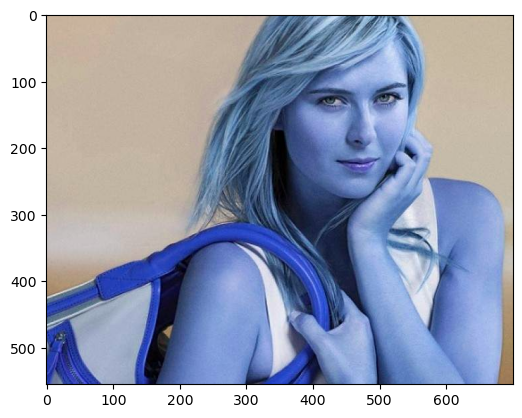

In [11]:
plt.imshow(img)

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray.shape

(555, 700)

In [13]:
gray

array([[183, 183, 183, ..., 183, 182, 181],
       [183, 183, 183, ..., 184, 182, 181],
       [183, 183, 183, ..., 184, 183, 181],
       ...,
       [ 60,  62,  63, ..., 126, 126, 126],
       [ 64,  64,  65, ..., 126, 126, 126],
       [ 69,  66,  66, ..., 125, 125, 125]], dtype=uint8)

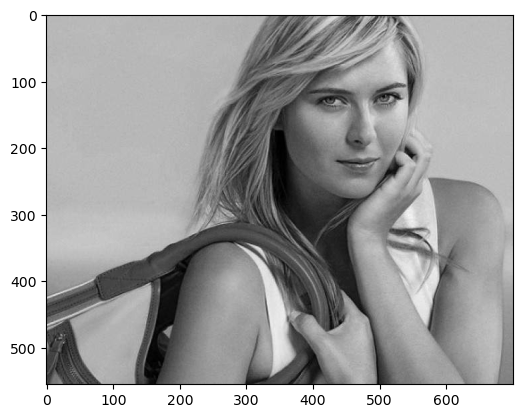

In [14]:
plt.imshow(gray,cmap='gray')

## 2. Face Detection using Haar Cascade algorithm 

In [15]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces #x,y,width,height

array([[356,  37, 233, 233]], dtype=int32)

In [16]:
(x,y,w,h) = faces[0]
x,y,w,h

(356, 37, 233, 233)

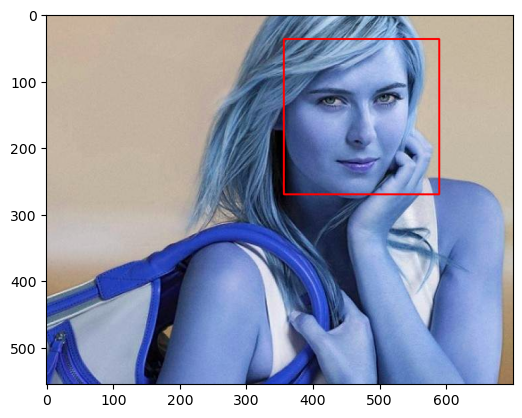

In [17]:
#draw red rectangle
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
plt.imshow(face_img)

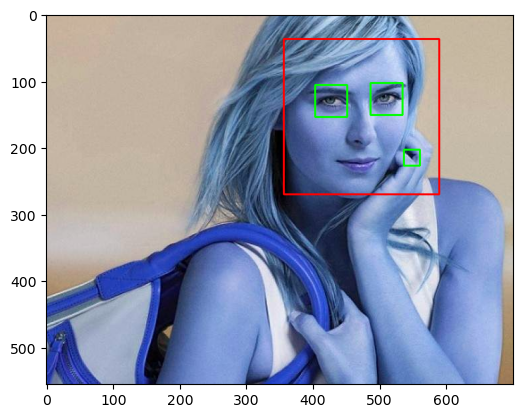

In [18]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

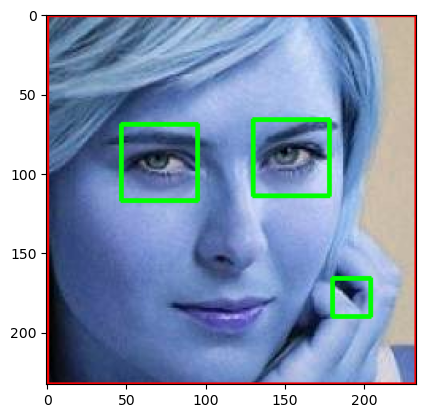

In [19]:
plt.imshow(roi_color, cmap='gray')

## 3. Function implementation 

In [20]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

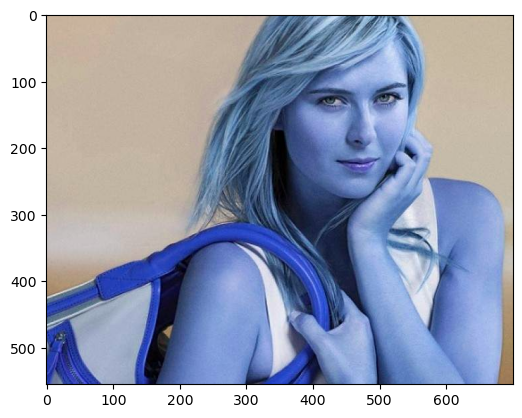

In [21]:
original_img = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_img)

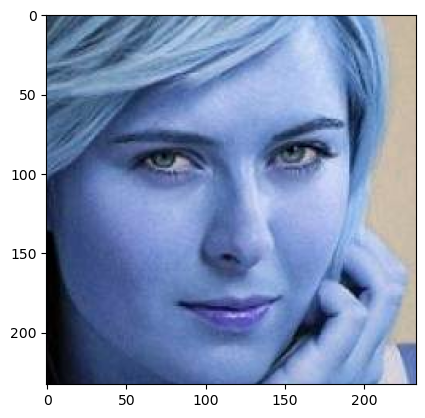

In [22]:
cropped_img = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_img)

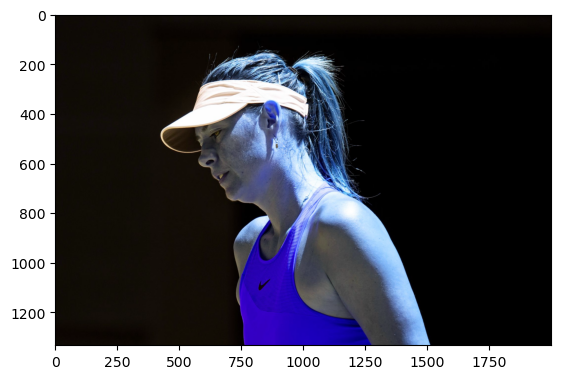

In [23]:
#for data we don't want to count in
wrong_img = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(wrong_img)

In [24]:
cropped_img2 = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_img2 #returned None

## 4. Collect Cropped images

In [25]:
path_to_data = './images_dataset/'
path_to_cr_data = './images_dataset/cropped/'

In [26]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        print(entry)
        img_dirs.append(entry.path)

<DirEntry 'maria_sharapova'>
<DirEntry 'virat_kohli'>
<DirEntry 'lionel_messi'>
<DirEntry '.ipynb_checkpoints'>
<DirEntry 'cropped'>
<DirEntry 'serena_williams'>
<DirEntry 'roger_federer'>


In [27]:
img_dirs
img_dirs.remove('./images_dataset/.ipynb_checkpoints')
img_dirs.remove('./images_dataset/cropped')
img_dirs

['./images_dataset/maria_sharapova',
 './images_dataset/virat_kohli',
 './images_dataset/lionel_messi',
 './images_dataset/serena_williams',
 './images_dataset/roger_federer']

In [28]:
#create the cropped dataset directory
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.makedirs(path_to_cr_data)
    

### Iterate dataset

In [29]:
cropped_img_dirs=[]
celebrity_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    name = img_dir.split('/')[-1]
    celebrity_file_name_dict[name] = []
#     print(name)
#     print(img_dir)
    for entry in os.scandir(img_dir):
#         print(entry.path)
        if 'DS' in entry.path:
            continue
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = name+str(count)+'.png'
            cropped_file_path = cropped_folder+'/'+cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color) #save the image
            celebrity_file_name_dict[name].append(cropped_file_path)
            count+=1

Generating cropped images in folder:  ./images_dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli
Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer


### Examples of collected images

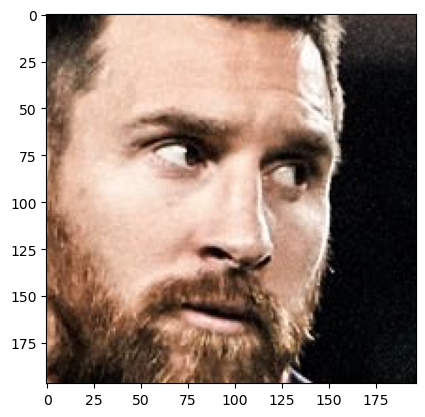

In [30]:
#Lionel messi example
img1 = cv2.imread(celebrity_file_name_dict['lionel_messi'][0])
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

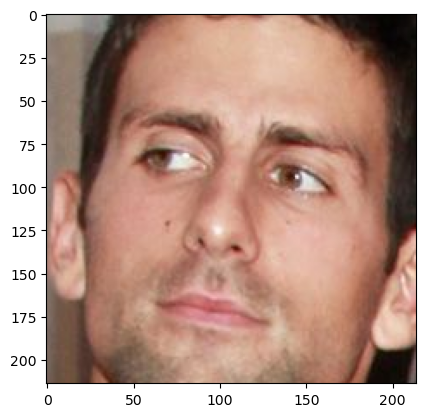

In [31]:
#Sharapova example
img1 = cv2.imread(celebrity_file_name_dict['maria_sharapova'][20])
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

- Here, notice that the collected images captured a wrong person in dataset.
- This is where our manual adjustments comes into play.
- I will proceed this project by deleting the wrong images in directory through a simple eye-balling.

## 5. Feature Engineering 
- Here, we are going to use wavelet transform to extract features from images.

In [32]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

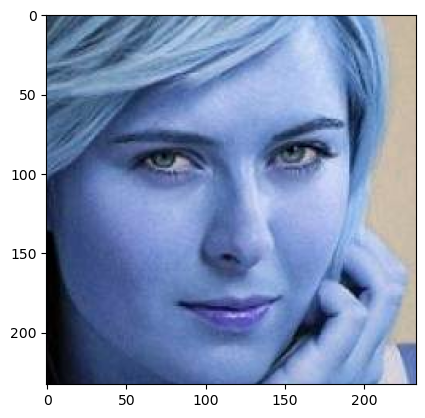

In [33]:
plt.imshow(cropped_img, cmap='gray')

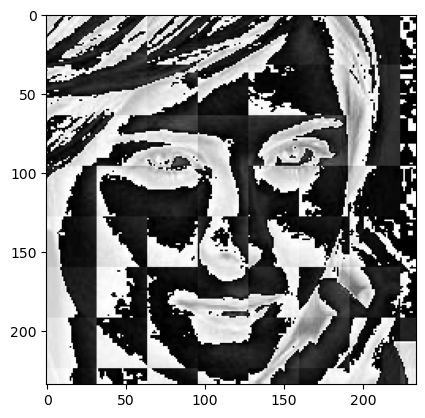

In [34]:
img_har = w2d(cropped_img,'db1', 5)
plt.imshow(img_har, cmap='gray')

## 6. Construct training data (input, output)
- Here, we prepare a dataset by stacking original image with transformed image.


In [49]:
#construct labels
class_dict = {}
for i,n in enumerate(celebrity_file_name_dict.keys()):
    class_dict[n] = i
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [50]:
X = [] #to store data
y = [] #to store labels

for name, files in celebrity_file_name_dict.items():
    for img in files:
        #original image
        img = cv2.imread(img)
        if img is None:
            continue
        scaled_img = cv2.resize(img,(32,32))
        
        #transformed image
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        
        #vectorize and stack the images
        combined_image = np.vstack((scaled_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        X.append(combined_image)
        y.append(class_dict[name])

[ WARN:0@1447.509] global loadsave.cpp:248 findDecoder imread_('./images_dataset/cropped/maria_sharapova/maria_sharapova8.png'): can't open/read file: check file path/integrity
[ WARN:0@1447.570] global loadsave.cpp:248 findDecoder imread_('./images_dataset/cropped/maria_sharapova/maria_sharapova21.png'): can't open/read file: check file path/integrity
[ WARN:0@1447.588] global loadsave.cpp:248 findDecoder imread_('./images_dataset/cropped/maria_sharapova/maria_sharapova26.png'): can't open/read file: check file path/integrity
[ WARN:0@1447.588] global loadsave.cpp:248 findDecoder imread_('./images_dataset/cropped/maria_sharapova/maria_sharapova27.png'): can't open/read file: check file path/integrity
[ WARN:0@1447.599] global loadsave.cpp:248 findDecoder imread_('./images_dataset/cropped/maria_sharapova/maria_sharapova33.png'): can't open/read file: check file path/integrity
[ WARN:0@1447.613] global loadsave.cpp:248 findDecoder imread_('./images_dataset/cropped/virat_kohli/virat_kohl

- Simply ignore the warnings above since it's due to the manual data deletion.

In [51]:
X[0].shape

(4096, 1)

In [52]:
print(len(X))
print(X[0].shape)
print(len(y))
X[0]

165
(4096, 1)
165


array([[173],
       [174],
       [174],
       ...,
       [253],
       [233],
       [252]], dtype=uint8)

In [53]:
#convert to float
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(165, 4096)

In [54]:
X[0]

array([173., 174., 174., ..., 253., 233., 252.])

## 7. Traning models
- I will use SVM here because SVM is effective in handling high-dimesion data such as images.


In [55]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [64]:
#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#construct pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))]) #default parameters for now, finetuing later

#train the model
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8809523809523809

In [68]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.93      1.00      0.96        13
           2       0.78      0.88      0.82         8
           3       0.83      1.00      0.91         5
           4       1.00      0.56      0.71         9

    accuracy                           0.88        42
   macro avg       0.88      0.89      0.87        42
weighted avg       0.89      0.88      0.87        42



### Testing different models & Hyperparameter tuning with GridSearchCV
- Here, we want to find out the best model by varying hyper-parameters

In [77]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [88]:
model_params = {
    'svm':{
        'model':svm.SVC(gamma='auto', probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{ 
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear', multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [95]:
import pandas as pd
scores = [] #to store overall results
best_estimators = {} #to store best result for each model

for model,model_info in model_params.items():
    #create pipeline
    pipe = make_pipeline(StandardScaler(),model_info['model'])
    clf = GridSearchCV(pipe, model_info['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train) #gridsearch internally split train / validation
    scores.append({
        'model':model,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[model] = clf.best_estimator_
    

0.78 ...
0.6093333333333334 ...
0.8286666666666667 ...


In [97]:
#scores on validation set
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.780000,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.609333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.828667,{'logisticregression__C': 1}


## 8. Scores on Test set & Confusion Matrix

In [99]:
best_estimators['svm'].score(X_test,y_test)

0.8809523809523809

In [101]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9285714285714286

In [103]:
best_estimators['random_forest'].score(X_test,y_test)

0.7619047619047619

In [104]:
best_clf = best_estimators['logistic_regression']

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0],
       [ 1,  0,  7,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 1,  1,  0,  0,  7]])

Text(95.72222222222221, 0.5, 'Ground Truth')

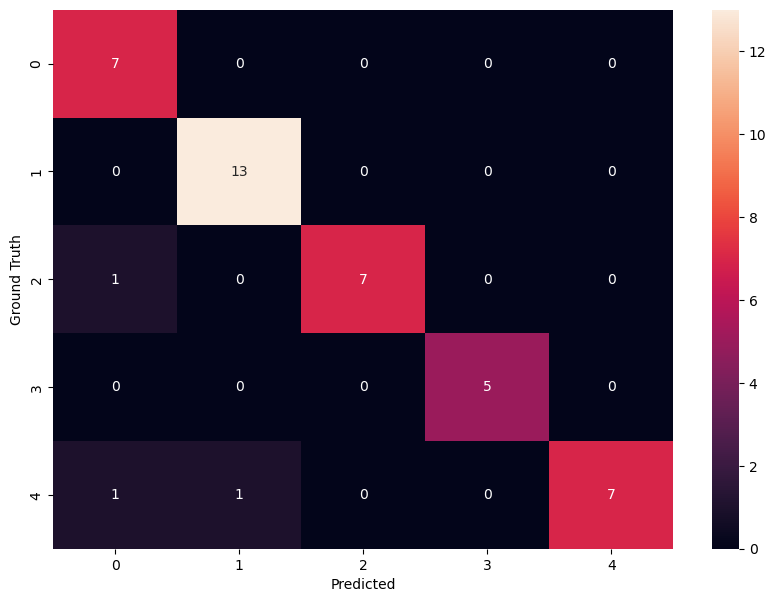

In [108]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')


In [109]:
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

## 8. Save the model & Save class dictionary

In [112]:
import joblib
import json
#Save the model
joblib.dump(best_clf, 'saved_model.pkl')

#save the class dictionary
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))